In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [55]:
!pip install pandas
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
!pip install trading_calendars==2.0.0
!pip install numpy==1.24.2
!pip install pandas==1.2.4
from zipline.utils.calendar_utils import register_calendar, get_calendar

In [56]:
bundle_data = bundles.load("quandl")

In [57]:
print(type(bundle_data))

<class 'zipline.data.bundles.core.BundleData'>


In [58]:
end_date = pd.Timestamp("2014-01-01", tz = "utc")


In [42]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00')

In [59]:
trading_calendar = get_calendar("NYSE")
print("Calendar instance in module:", id(trading_calendars.exchange_calendar_xnys.XNYSExchangeCalendar))
print("Calendar instance in get_calendar():", id(get_calendar("NYSE")))
#print("Trading Calendar:", trading_calendar)
#print("Asset Finder Calendar:", bundle_data.asset_finder)
#print(bundle_data.equity_daily_bar_reader.first_trading_day)
#print("Reader Calendar:", bundle_data.equity_daily_bar_reader.trading_calendar)
data_por = DataPortal(
    asset_finder = bundle_data.asset_finder,
    first_trading_day = bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_daily_reader = bundle_data.equity_daily_bar_reader,
    trading_calendar=trading_calendar,
)


Calendar instance in module: 2453079503424
Calendar instance in get_calendar(): 2453104047968


In [60]:
TSLA = data_por.asset_finder.lookup_symbol(
    "TSLA",
    as_of_date = None

)

data_por: This is an instance of the DataPortal class that you've created. It contains various attributes and methods to interact with financial data, including asset-related data.

asset_finder: This is a part of the DataPortal that allows you to look up assets based on their identifiers (e.g., symbols). The lookup_symbol() method is used to perform such a lookup.

"TSLA": This is the symbol of the asset you want to look up. In this case, you're looking up an asset with the symbol "TSLA," which typically refers to Tesla, Inc.

as_of_date=None: This parameter specifies the date at which you want to look up the asset. If you set it to None, it means you want to look up the asset as of the latest date available in your data. If you specify a date, the method will return the asset information available on that specific date.

The lookup_symbol() method returns an Asset object that represents the asset with the given symbol. This Asset object contains various properties and metadata related to the asset, such as its unique identifier, symbol, start and end dates, and more. You can use this Asset object to reference the asset in various parts of your trading algorithm.

In [77]:
df = data_por.get_history_window(
    assets = [TSLA],
    end_dt = end_date,
    bar_count = 31 *12,
    frequency= '1d',
    data_frequency = 'daily',
    field = 'open'

)

assets: This is a list of asset objects for which you want to retrieve historical data. In your case, you're using [TSLA], which is a list containing the Asset object representing the asset with the symbol "TSLA" that you obtained using the lookup_symbol() method.

end_dt: This is the end date of the historical data window. The retrieved data will cover a period leading up to this end date.

bar_count: The number of bars (data points) you want to retrieve in the historical data window. In your code, it seems you're trying to retrieve the data for the past 31 months (31 * 12).

frequency: The frequency of the data you want to retrieve. In your case, '1d' indicates that you want daily data.

data_frequency: This specifies the frequency of the data you want to retrieve. Since you're retrieving daily data, 'daily' is appropriate here.

field: This parameter specifies which field of the historical data you want to retrieve. In your case, 'open' indicates that you want to retrieve the opening prices for the specified assets.

The get_history_window() method returns a Pandas DataFrame containing the historical data for the specified asset(s) according to the provided parameters. The DataFrame will have columns corresponding to the requested fields (in this case, 'open') and rows corresponding to the specified date range and frequency. You can use this DataFrame to analyze and manipulate the historical data in your trading algorithm.

In [78]:
df.head()

,Equity(2862 [TSLA])
2012-07-11,31.57
2012-07-12,31.29
2012-07-13,32.97
2012-07-16,34.32
2012-07-17,35.00


In [79]:
df.describe()

,Equity(2862 [TSLA])
count,372.000000
mean,80.908043
std,55.761556
min,26.840000
25%,32.780000
50%,42.730000
75%,136.442500
max,193.960000


In [80]:
df.index = pd.DatetimeIndex(df.index)

df: This is the DataFrame containing historical data that you obtained using the get_history_window() method.

df.index: This retrieves the current index of the DataFrame, which is likely a regular index.

pd.DatetimeIndex(df.index): This creates a new DatetimeIndex object from the existing index of the DataFrame. It converts the index values to datetime objects if they are not already.

In [81]:
df.index

DatetimeIndex(['2012-07-11', '2012-07-12', '2012-07-13', '2012-07-16',
               '2012-07-17', '2012-07-18', '2012-07-19', '2012-07-20',
               '2012-07-23', '2012-07-24',
               ...
               '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-23',
               '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30',
               '2013-12-31', '2014-01-02'],
              dtype='datetime64[ns]', length=372, freq='C')

In [82]:
list(df.columns)[0]

Equity(2862 [TSLA])

In [83]:
df['open'] = df[list(df.columns)[0]]

In [84]:
df['open']

2012-07-11     31.57
2012-07-12     31.29
2012-07-13     32.97
2012-07-16     34.32
2012-07-17     35.00
               ...  
2013-12-26    155.04
2013-12-27    155.30
2013-12-30    151.12
2013-12-31    152.32
2014-01-02    149.80
Freq: C, Name: open, Length: 372, dtype: float64

In [85]:
df.head()

,Equity(2862 [TSLA]),open
2012-07-11,31.57,31.57
2012-07-12,31.29,31.29
2012-07-13,32.97,32.97
2012-07-16,34.32,34.32
2012-07-17,35.00,35.00


In [91]:
df = df.drop(columns = [list(df.columns)[0]] )

In [92]:
df.columns 

Index(['open'], dtype='object')

In [93]:
df.head()

,open
2012-07-11,31.57
2012-07-12,31.29
2012-07-13,32.97
2012-07-16,34.32
2012-07-17,35.00


In [94]:
df['close'] = data_por.get_history_window(
    assets = [TSLA],
    end_dt = end_date,
    bar_count = 31 *12,
    frequency= '1d',
    data_frequency = 'daily',
    field = 'close'

)

In [95]:
df['low'] = data_por.get_history_window(
    assets = [TSLA],
    end_dt = end_date,
    bar_count = 31 *12,
    frequency= '1d',
    data_frequency = 'daily',
    field = 'low'

)

In [96]:
df['high'] = data_por.get_history_window(
    assets = [TSLA],
    end_dt = end_date,
    bar_count = 31 *12,
    frequency= '1d',
    data_frequency = 'daily',
    field = 'high'

)

In [97]:
df.head()

,open,close,low,high
2012-07-11,31.57,31.51,31.01,31.68
2012-07-12,31.29,32.70,30.80,33.01
2012-07-13,32.97,34.25,32.83,34.40
2012-07-16,34.32,35.96,33.90,36.00
2012-07-17,35.00,33.35,32.38,35.21


In [98]:
df.tail()

,open,close,low,high
2013-12-26,155.04,155.500,154.290,158.000
2013-12-27,155.30,151.120,150.800,155.500
2013-12-30,151.12,152.440,150.750,154.810
2013-12-31,152.32,150.429,148.661,153.200
2014-01-02,149.80,150.100,146.550,152.477


In [99]:
from zipline.data.data_portal import OHLCV_FIELDS

from zipline.data.data_portal: This is the import statement that specifies the module from which you want to import the OHLCV_FIELDS constant.

OHLCV_FIELDS: This is the constant itself. It's a tuple containing string values that represent the standard fields used in financial data analysis. The fields included in OHLCV_FIELDS are typically Open, High, Low, Close, and Volume, which are key data points when analyzing historical price data.

In [100]:
print(OHLCV_FIELDS)

frozenset({'open', 'low', 'volume', 'close', 'high'})


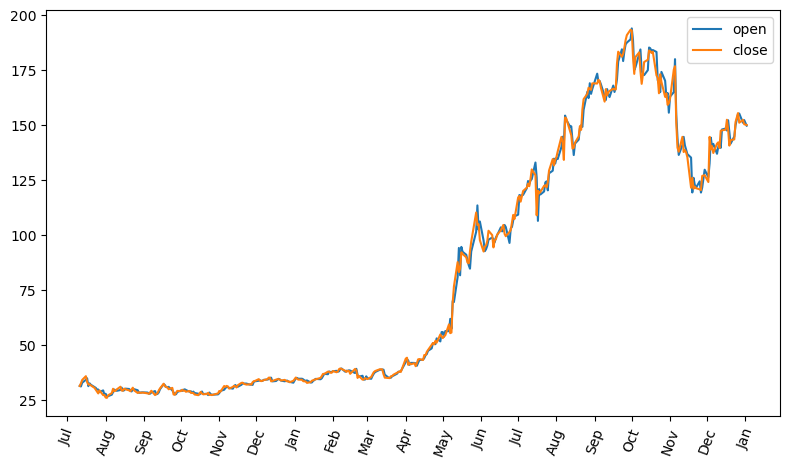

In [103]:
from matplotlib.dates import MonthLocator, date2num, DateFormatter

fig, ax = plt.subplots()

fig.subplots_adjust(bottom = 0.3)

fig.set_figwidth(15)
fig.set_figwidth(8)

ax.plot(df.index, df.open, label = 'open')
ax.plot(df.index, df.close, label = 'close')

lctr = MonthLocator() # This to iterate over each month
frmt = DateFormatter('%b') # %d gives us Jan, feb, mar etc

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

ax.legend()

plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(): This creates a figure and a subplot within the figure. The subplot will be referred to as ax for further customization.

fig.subplots_adjust(bottom=0.3): This adjusts the bottom margin of the subplot to accommodate x-axis labels or other annotations.

fig.set_figwidth(15) and fig.set_figheight(8): These lines set the width and height of the figure.

ax.plot(df.index, df.open, label='Open'): This plots the open prices from the DataFrame df against the datetime index. The label parameter is used to identify the series in the legend.

ax.plot(df.index, df.close, label='Close'): This plots the close prices from the DataFrame df against the datetime index.

lctr = MonthLocator() and frmt = DateFormatter('%b'): These lines create a MonthLocator and a DateFormatter to format the x-axis tick labels to show the abbreviated month names.

ax.xaxis.set_major_locator(lctr) and ax.xaxis.set_major_formatter(frmt): These lines set the x-axis major tick locator and formatter to show the month names.

ax.legend(): This adds a legend to the plot using the labels specified in the plot function calls.

plt.xticks(rotation=70): This rotates the x-axis tick labels by 70 degrees for better visibility.

plt.tight_layout(): This adjusts the layout of the plot to ensure all components fit well.

plt.show(): This displays the plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


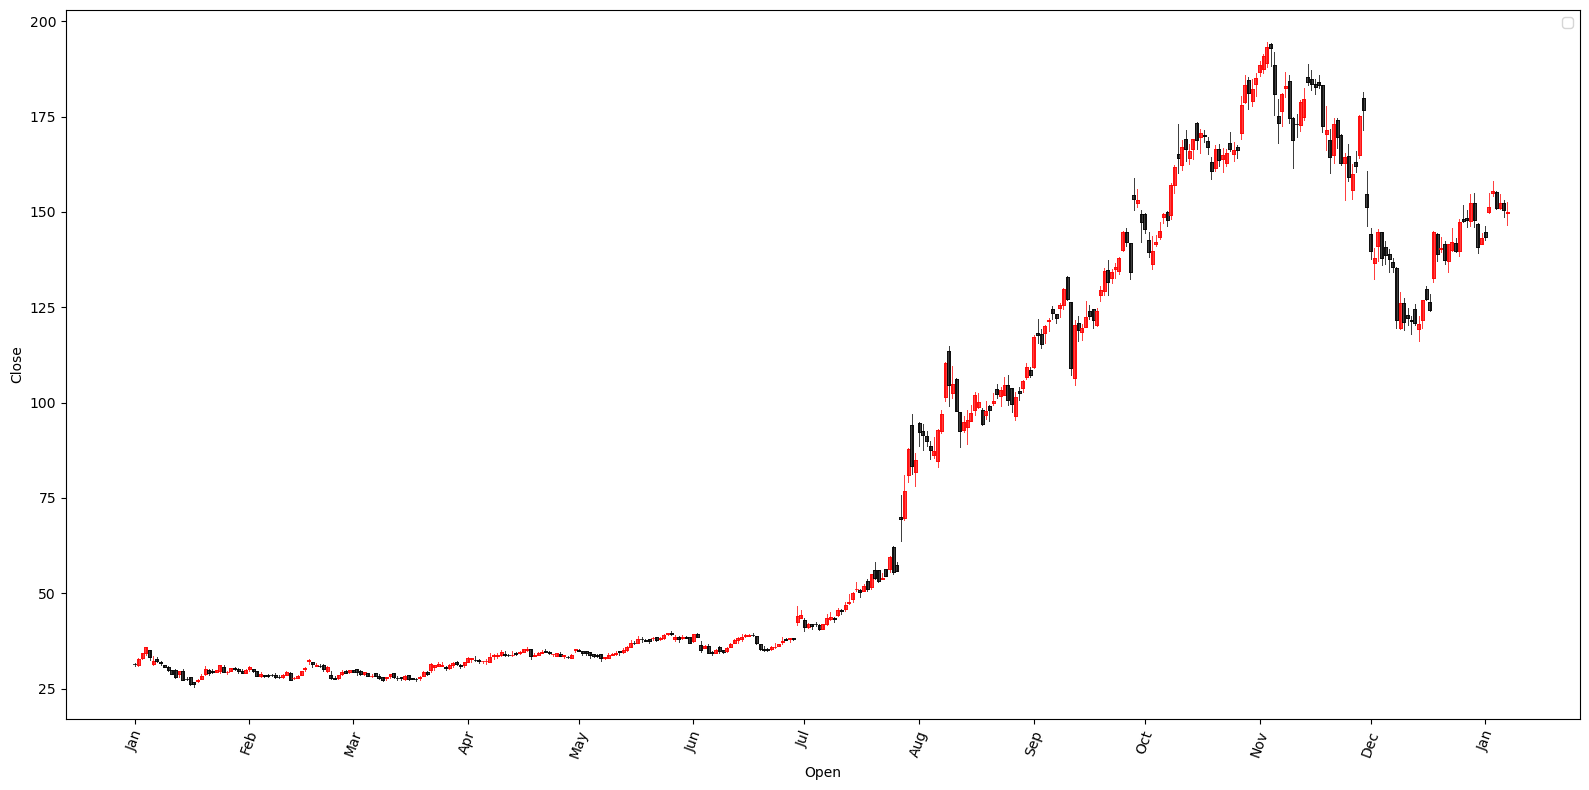

In [109]:
# Candle stick charts
!pip install mpl_finance
from mpl_finance import candlestick2_ohlc

fig, ax = plt.subplots()

fig.subplots_adjust(bottom = 0.3)

fig.set_figwidth(16)
fig.set_figheight(8)

lctr = MonthLocator()
frmt = DateFormatter('%b')

ax.xaxis.set_major_locator(lctr)
ax.xaxis.set_major_formatter(frmt)

candlestick2_ohlc(ax, opens = df.open,
                 closes = df.close,
                 highs = df.high,
                 lows = df.low,
                 width = 0.8,
                 colorup = 'r',
                 colordown = 'k')
plt.xlabel('Open')
plt.ylabel('Close')
plt.xticks(rotation = 70)
plt.tight_layout()
plt.legend()
plt.show()